In [2]:
print("hello")

hello


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [3]:
df= pd.read_csv("merged.csv")
df.head()

,Latency,ts-basic-service_queryForStationId,ts-basic-service_queryForTravel,ts-config-service_retrieve,ts-order-service_calculateSoldTicket,ts-order-service_getTicketListByDateAndTripId,ts-price-service_query,ts-route-service_queryById,ts-seat-service_getLeftTicketOfInterval,ts-station-service_queryForStationId,ts-ticketinfo-service_queryForStationId,ts-ticketinfo-service_queryForTravel,ts-train-service_retrieve,ts-travel-service_getRouteByTripId,ts-travel-service_getTrainTypeByTripId,anomaly
0,126,26,21,5,3,5,3,13,40,22,38,23,9,10,11,0
1,102,19,19,3,2,4,3,12,33,16,27,20,7,10,8,0
2,108,19,19,4,3,4,3,12,32,16,31,20,7,9,8,0
3,147,18,31,4,38,4,3,29,53,14,27,32,8,29,8,1
4,115,20,21,4,38,4,3,17,37,16,30,23,8,13,8,0


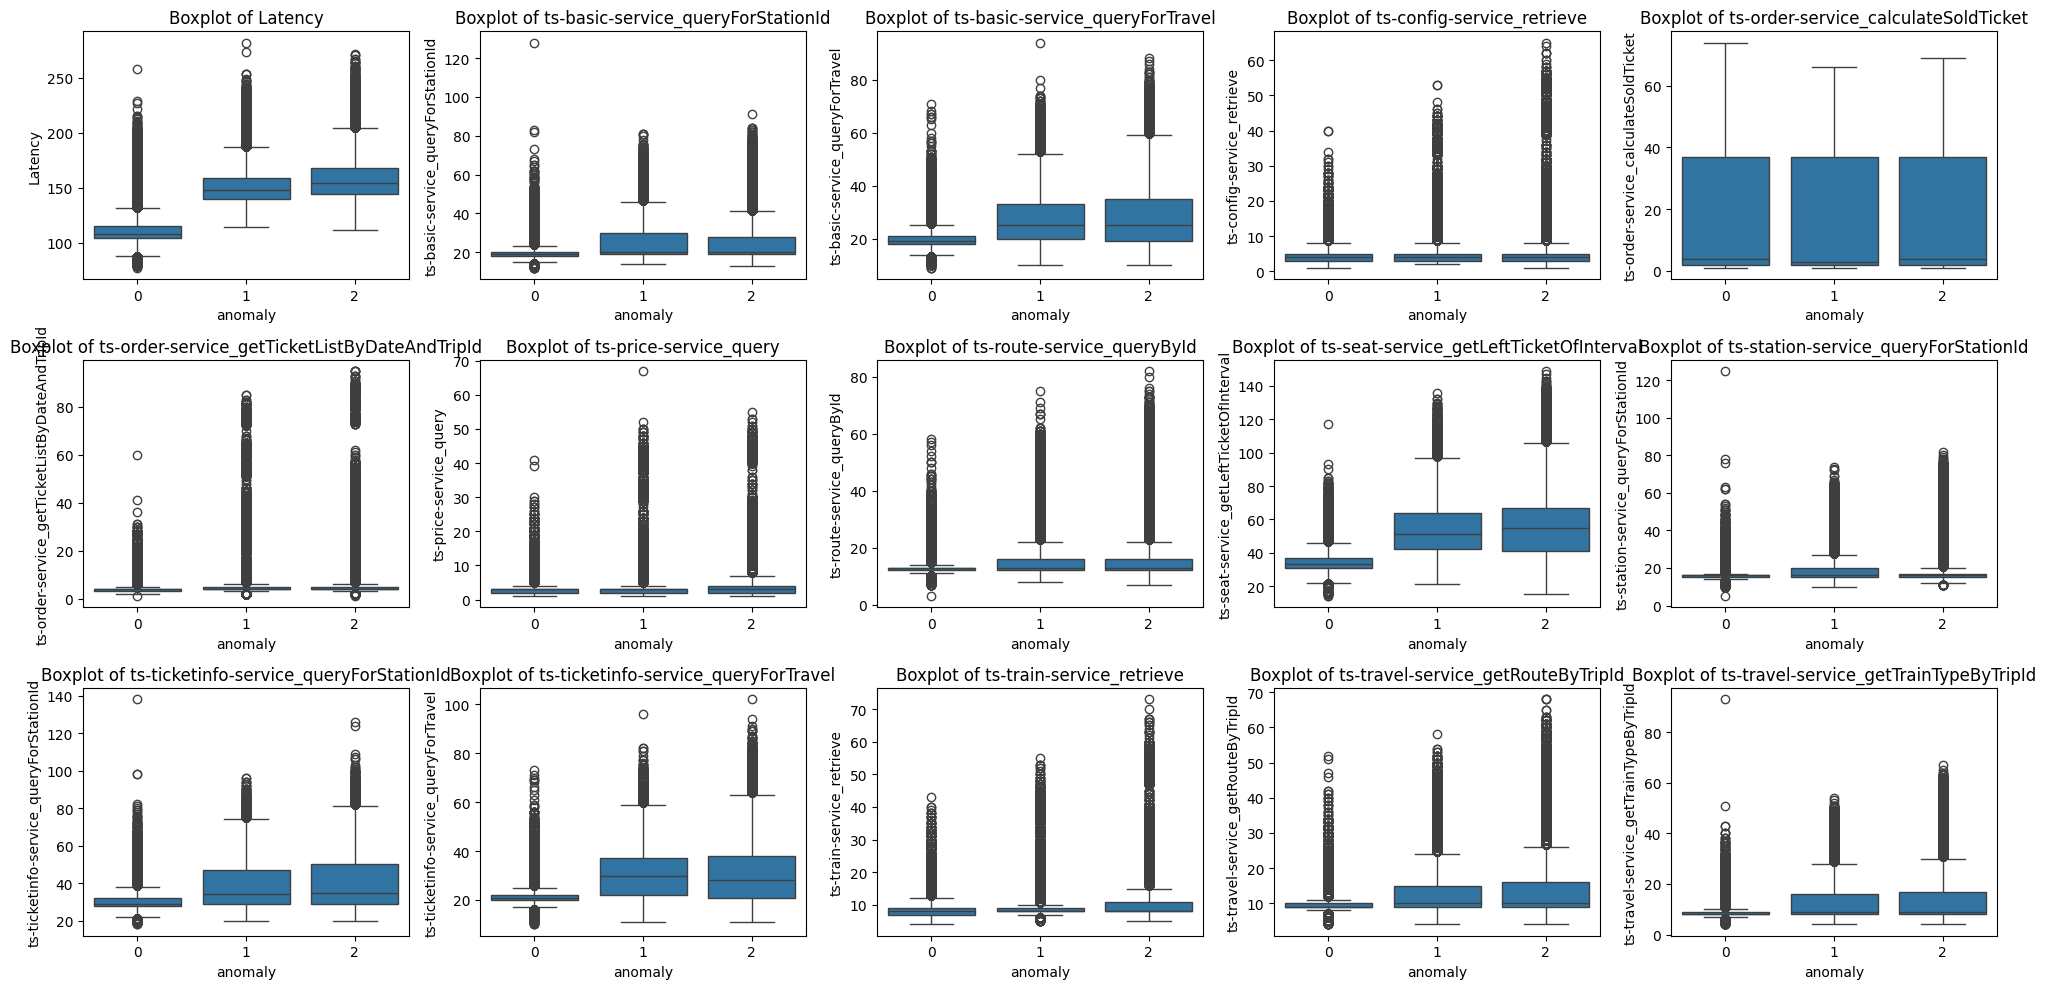

In [4]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x='anomaly', y=column, data=df)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

<Axes: >

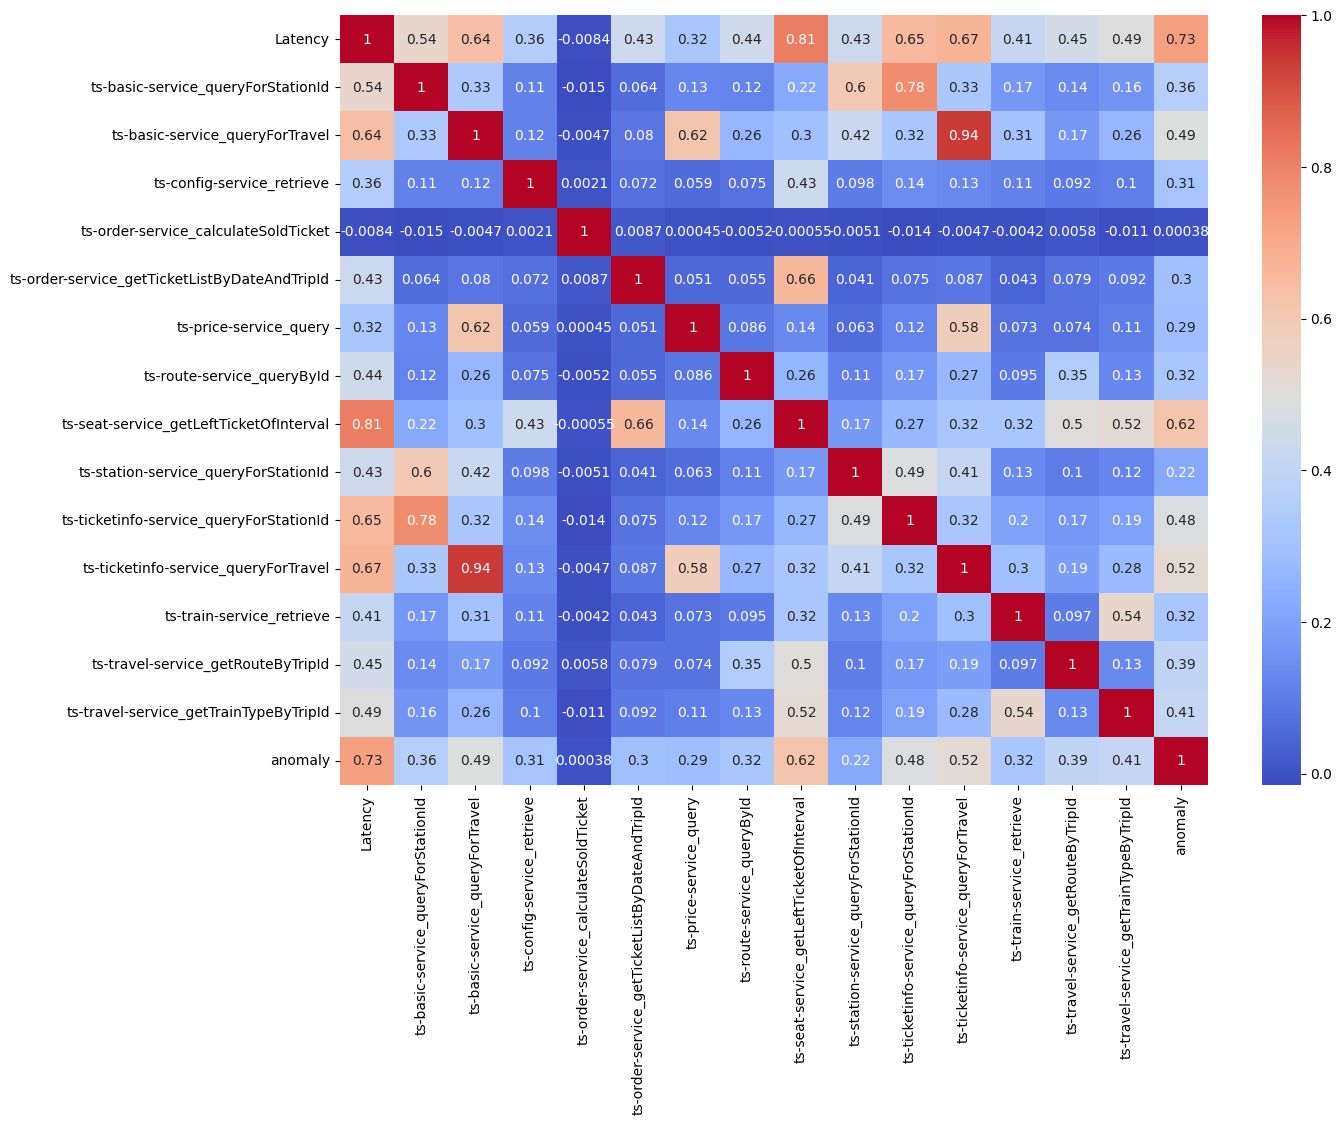

In [5]:
# Create a correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Accuracy: 0.9807686776098796
Confusion Matrix:
[[336587    647    157]
 [   600  36261   3265]
 [   171   3183  36313]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337391
           1       0.90      0.90      0.90     40126
           2       0.91      0.92      0.91     39667

    accuracy                           0.98    417184
   macro avg       0.94      0.94      0.94    417184
weighted avg       0.98      0.98      0.98    417184



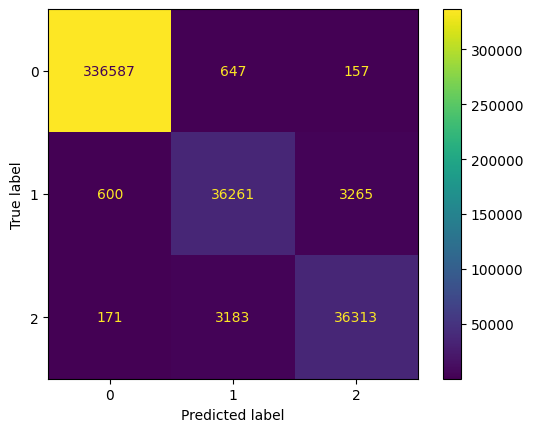

In [15]:
X = df.drop("anomaly", axis=1)
y = df["anomaly"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()


In [6]:
X = df.drop('anomaly', axis=1)
y = df['anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot()
plt.show()


Confusion Matrix:
[[336986    350     55]
 [    67  38257   1802]
 [     7   1571  38089]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    337391
           1       0.95      0.95      0.95     40126
           2       0.95      0.96      0.96     39667

    accuracy                           0.99    417184
   macro avg       0.97      0.97      0.97    417184
weighted avg       0.99      0.99      0.99    417184



NameError: name 'model' is not defined

/Users/sboyapal/Documents/hallucinatters/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9006553463220066

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    337391
           1       0.56      0.49      0.52     40126
           2       0.63      0.60      0.61     39667

    accuracy                           0.90    417184
   macro avg       0.72      0.69      0.70    417184
weighted avg       0.89      0.90      0.90    417184


Logistic Regression Confusion Matrix:
[[332183   4018   1190]
 [  7463  19841  12822]
 [  4348  11604  23715]]


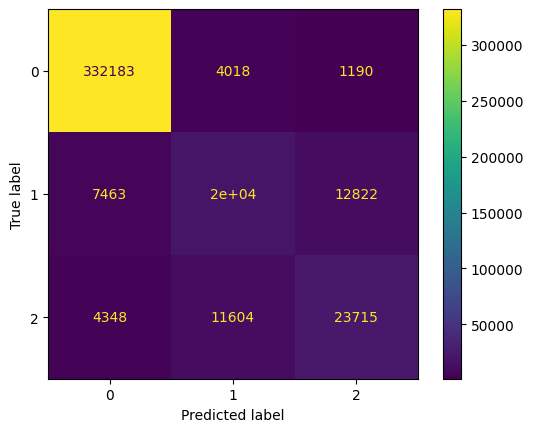

In [8]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("\nLogistic Regression Classification Report:")
conf_matrix=confusion_matrix(y_test, logistic_y_pred)
print(classification_report(y_test, logistic_y_pred))
print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logistic_model.classes_)
disp.plot()
plt.show()

In [18]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                          Feature  Importance
0                                         Latency    0.195107
8         ts-seat-service_getLeftTicketOfInterval    0.159746
11           ts-ticketinfo-service_queryForTravel    0.092533
10        ts-ticketinfo-service_queryForStationId    0.083813
14         ts-travel-service_getTrainTypeByTripId    0.059051
2                 ts-basic-service_queryForTravel    0.056871
13             ts-travel-service_getRouteByTripId    0.052465
12                      ts-train-service_retrieve    0.050587
7                      ts-route-service_queryById    0.046905
5   ts-order-service_getTicketListByDateAndTripId    0.046028
1              ts-basic-service_queryForStationId    0.044017
3                      ts-config-service_retrieve    0.033368
6                          ts-price-service_query    0.033142
9            ts-station-service_queryForStationId    0.030875
4            ts-order-service_calculateSoldTicket

In [31]:
test_df = pd.read_csv("/Users/shashank/Documents/Projects/data-dynamo/data/trainticket/005.csv")

# Assuming the test CSV has the same features as the training data except for the target variable
X_test = test_df.drop('anomaly', axis=1)
y_test = test_df['anomaly']

# Make predictions on the test data using the trained model
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[9042    0    0]
 [   0 1057   33]
 [   0   78 1037]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9042
           1       0.93      0.97      0.95      1090
           2       0.97      0.93      0.95      1115

    accuracy                           0.99     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.99      0.99      0.99     11247

